In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")

In [2]:
# The data, split between train and test sets:
(x_train_, y_train_), (x_test_, y_test_) = cifar10.load_data()
# delete C:/Users/Your_UserName/.keras/datasets/
print('x_train_ shape:', x_train_.shape)
print('x_test_ shape:', x_test_.shape)
print('y_train_ shape:', y_train_.shape)
print('y_test_ shape:', y_test_.shape)
print('y_train_:', y_train_)
print('y_test_:', y_test_)
# airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, & trucks

x_train_ shape: (50000, 32, 32, 3)
x_test_ shape: (10000, 32, 32, 3)
y_train_ shape: (50000, 1)
y_test_ shape: (10000, 1)
y_train_: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
y_test_: [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [3]:
x_train, __x, y_train, __y = train_test_split(x_train_, y_train_, train_size=7500, stratify=y_train_, random_state=0)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('y_train:', y_train)

x_train shape: (7500, 32, 32, 3)
y_train shape: (7500, 1)
y_train: [[6]
 [5]
 [6]
 ...
 [5]
 [4]
 [6]]


In [4]:
x_val, __x, y_val, __y = train_test_split(__x, __y, train_size=1250, stratify=__y, random_state=0)
print('x_val shape:', x_val.shape)
print('y_val shape:', y_val.shape)

x_val shape: (1250, 32, 32, 3)
y_val shape: (1250, 1)


In [5]:
x_test, __x, y_test, __y = train_test_split(x_test_, y_test_, train_size=1250, stratify=y_test_, random_state=0)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_test shape: (1250, 32, 32, 3)
y_test shape: (1250, 1)


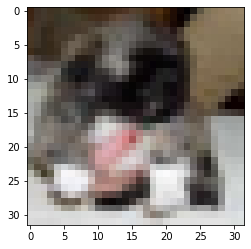

Label: 5


In [6]:
plt.imshow(x_train[5])
plt.show()
print('Label:', y_train[5][0])

In [7]:
num_classes = 10

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)

print('y_train:', y_train)
print('y_val:', y_val)
print('y_test:', y_test)

y_train shape: (7500, 10)
y_val shape: (1250, 10)
y_test shape: (1250, 10)
y_train: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_val: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_test: [[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]]


In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3))) 
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3))) 
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2))) 
#model.add(Dropout(0.5))


model.add(Flatten())
#Neural Network regime

model.add(Dense(32))
model.add(Activation('relu'))
# model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [9]:
# initiate Adam optimizer
opt = keras.optimizers.Adam(lr=0.005)

# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_val /= 255.0
x_test /= 255.0

if not os.path.exists('saved_cnn_models'):
    os.mkdir('saved_cnn_models')

num_epochs = 50
filepath = 'saved_cnn_models/model-{epoch:05d}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)
callbacks_list = [checkpoint]

In [10]:
history = model.fit(x=x_train, y=y_train, batch_size=250, epochs=num_epochs, verbose=1, callbacks=callbacks_list,
              validation_data=(x_val, y_val))

Epoch 1/50
30/30 [==============================] - 4s 26ms/step - loss: 2.3103 - accuracy: 0.0940 - val_loss: 2.2458 - val_accuracy: 0.1496

Epoch 00001: saving model to saved_cnn_models/model-00001.h5
Epoch 2/50
30/30 [==============================] - 0s 12ms/step - loss: 2.2283 - accuracy: 0.1490 - val_loss: 2.0566 - val_accuracy: 0.1880

Epoch 00002: saving model to saved_cnn_models/model-00002.h5
Epoch 3/50
30/30 [==============================] - 0s 13ms/step - loss: 2.0293 - accuracy: 0.1990 - val_loss: 1.9129 - val_accuracy: 0.2544

Epoch 00003: saving model to saved_cnn_models/model-00003.h5
Epoch 4/50
30/30 [==============================] - 0s 12ms/step - loss: 1.9252 - accuracy: 0.2475 - val_loss: 1.7903 - val_accuracy: 0.2936

Epoch 00004: saving model to saved_cnn_models/model-00004.h5
Epoch 5/50
30/30 [==============================] - 0s 12ms/step - loss: 1.8795 - accuracy: 0.2689 - val_loss: 1.8689 - val_accuracy: 0.2552

Epoch 00005: saving model to saved_cnn_models/

In [11]:
history.history

{'accuracy': [0.10493333637714386,
  0.16279999911785126,
  0.2133333384990692,
  0.25386667251586914,
  0.26506665349006653,
  0.2955999970436096,
  0.34013333916664124,
  0.3657333254814148,
  0.37439998984336853,
  0.4073333442211151,
  0.41413334012031555,
  0.4326666593551636,
  0.43479999899864197,
  0.4357333481311798,
  0.4440000057220459,
  0.4544000029563904,
  0.4582666754722595,
  0.4681333303451538,
  0.4812000095844269,
  0.4689333438873291,
  0.4577333331108093,
  0.4885333478450775,
  0.4817333221435547,
  0.48053333163261414,
  0.4903999865055084,
  0.4844000041484833,
  0.5040000081062317,
  0.5109333395957947,
  0.503600001335144,
  0.49106666445732117,
  0.5058666467666626,
  0.5141333341598511,
  0.5170666575431824,
  0.5235999822616577,
  0.5162666440010071,
  0.5156000256538391,
  0.5289333462715149,
  0.5305333137512207,
  0.5333333611488342,
  0.5282666683197021,
  0.5322666764259338,
  0.5413333177566528,
  0.5360000133514404,
  0.5234666466712952,
  0.5401333

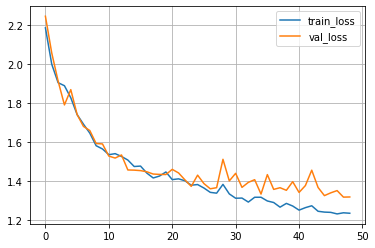

In [12]:
plt.plot(range(num_epochs-1), history.history['loss'][1:], label='train_loss')
plt.plot(range(num_epochs-1), history.history['val_loss'][:-1], label='val_loss')
plt.legend()
plt.grid()
plt.show()

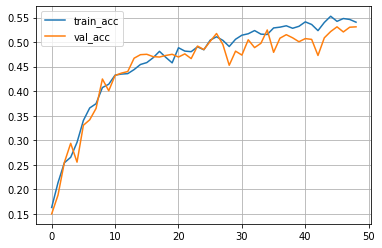

In [13]:
plt.plot(range(num_epochs-1), history.history['accuracy'][1:], label='train_acc')
plt.plot(range(num_epochs-1), history.history['val_accuracy'][:-1], label='val_acc')
plt.legend()
plt.grid()
plt.show()

In [14]:
print('Minimum Validation Loss:', np.min(history.history['val_loss']))
print('Best epoch corresponding to Minimum Validation Loss:', np.argmin(history.history['val_loss'])+1)

Minimum Validation Loss: 1.3167028427124023
Best epoch corresponding to Minimum Validation Loss: 48


In [19]:
model_best = load_model('saved_cnn_models/model-00048.h5')

In [20]:
scores = model_best.evaluate(x_test, y_test, verbose=1)

40/40 [==============================] - 0s 3ms/step - loss: 1.3383 - accuracy: 0.5152


In [21]:
scores

[1.3382636308670044, 0.5152000188827515]

In [22]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 1.3382636308670044
Test accuracy: 0.5152000188827515
